Step 1: Importing necessary libraries. However, we shall import remaining libraries once we open the required dataset and the needed alogorithms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 :Loading the dataset

In [2]:
df = pd.read_csv('smoking.csv')
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


Step 3: This is an classification dataset ie Binary classification. Output column being 'smoking'. Therefore, we shall import classifications algorithms. 

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

Step 4: Exploratory Data Analysis

In [4]:
df.isna().sum() # No null values. That's great. We don't have to perform any cleansing techniques.

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [6]:
df = df.drop(columns = ['ID','oral']) # Removing irrevelvant columns. ID is unique to every patient & has no significane. 
                                      # Oral also doesn't contribute to the variability of the data as all values are 'Y'.

In [7]:
df.shape

(55692, 25)

In [8]:
df.describe().T # Using .T here so that rows & col get interchanged & so that we can views all the coulmns.

,count,mean,std,min,25%,50%,75%,max
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0
relaxation,55692.0,76.004830,9.679278,40.0,70.0,76.0,82.0,146.0


Step 5: Visualizing the dataset

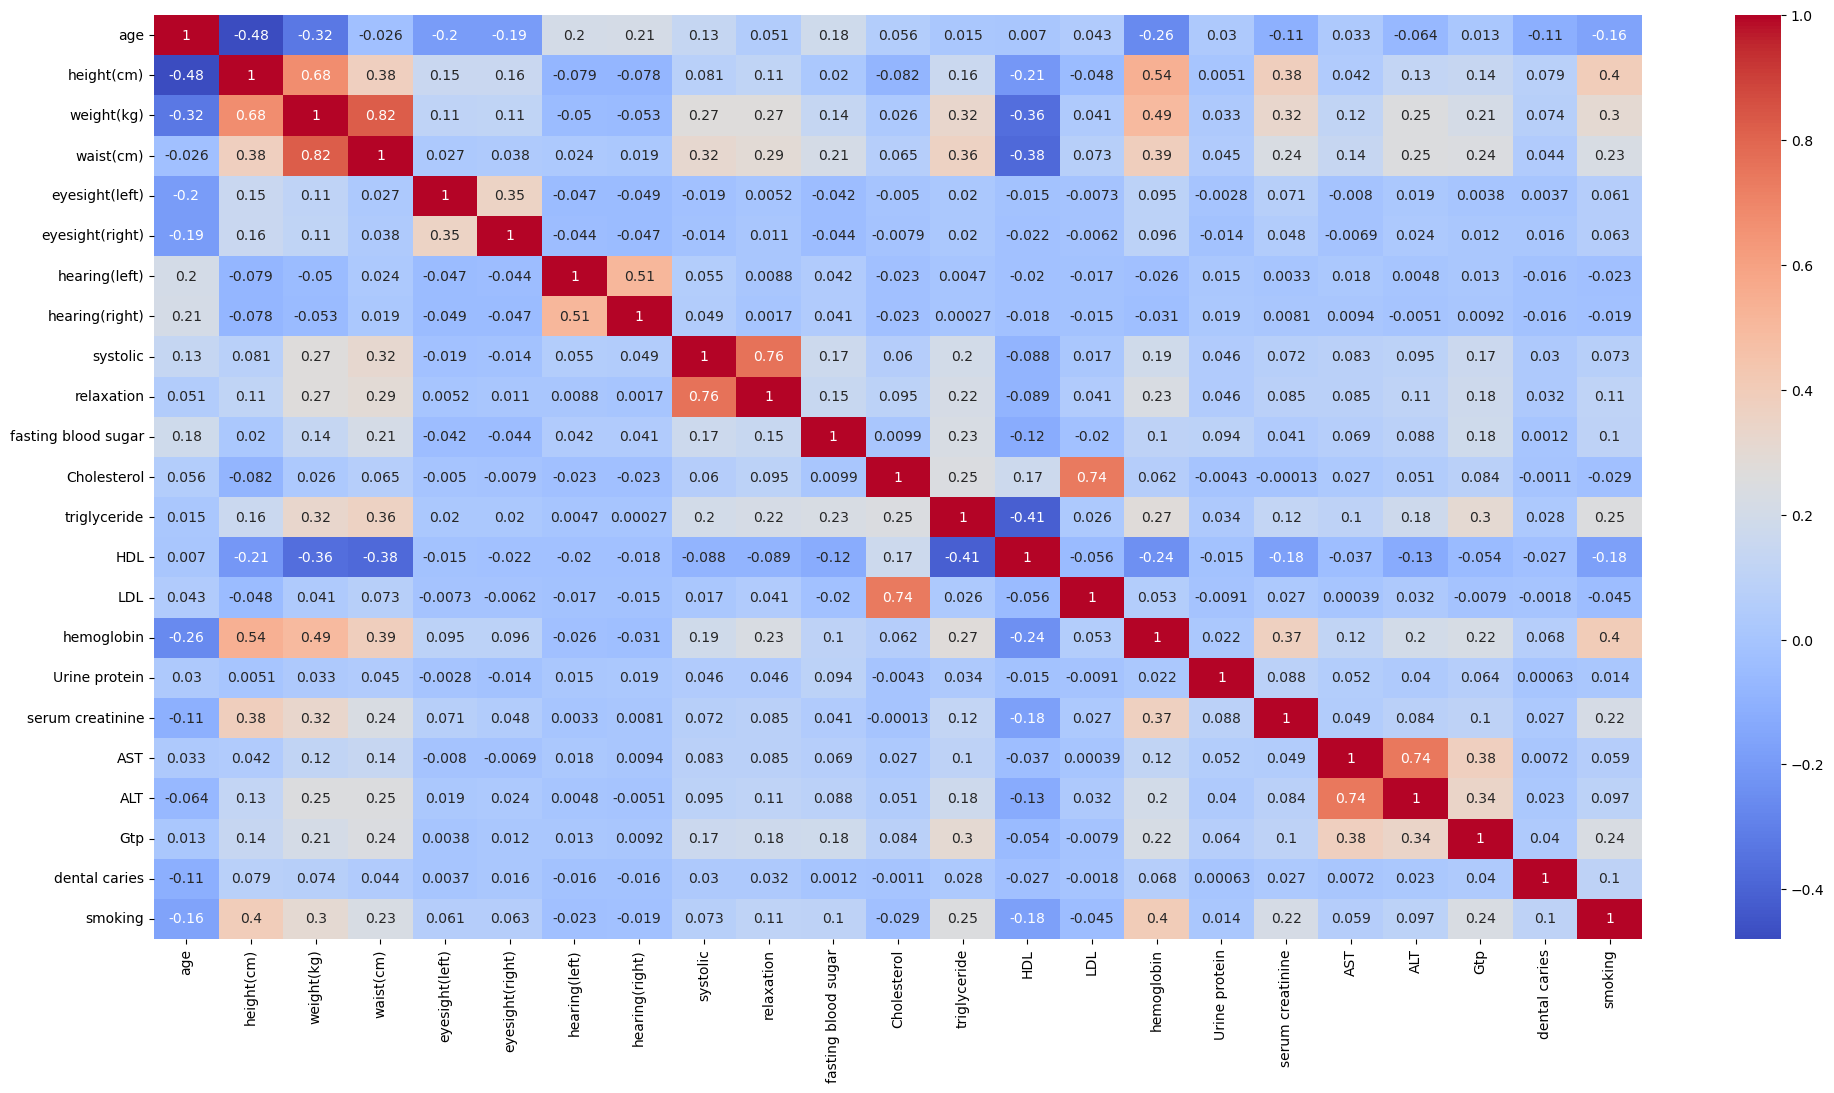

In [9]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') #Using corr to find the correleation between independent variables & dependent variables.
plt.show()

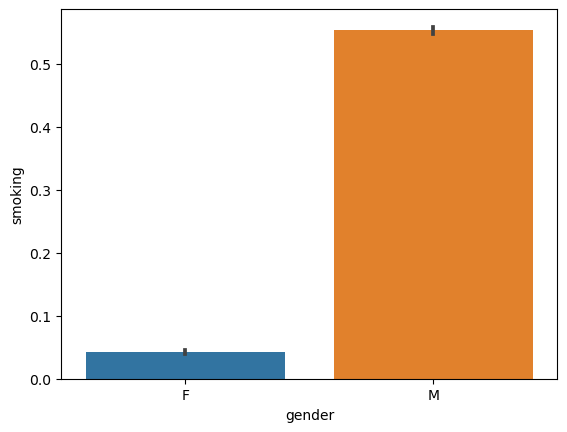

In [10]:
sns.barplot(x=df['gender'], y=df['smoking']) # No of men smoking are more than women. 
plt.show()

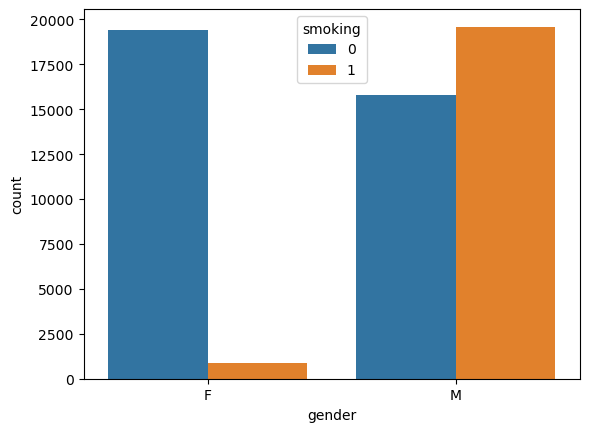

In [11]:
sns.countplot(x = df['gender'], hue=df['smoking']) # provides the count of both smokers & non smokers.
plt.show()

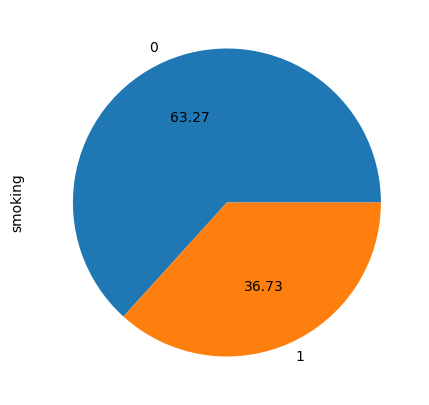

In [12]:
plt.figure(figsize=(10,5)) # % of smokers & non-smokers
df['smoking'].value_counts().plot.pie(autopct='%0.2f')
plt.show()

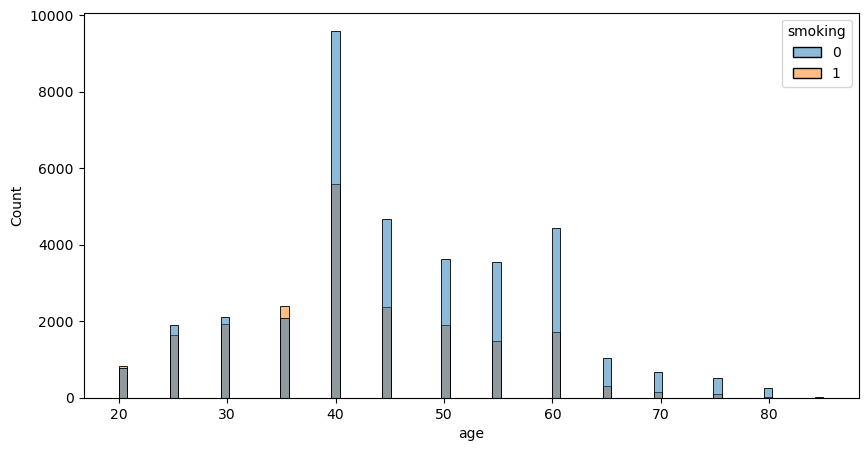

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['age'], hue=df['smoking']) #the most % of smokers are from the age group of 40.
plt.show()

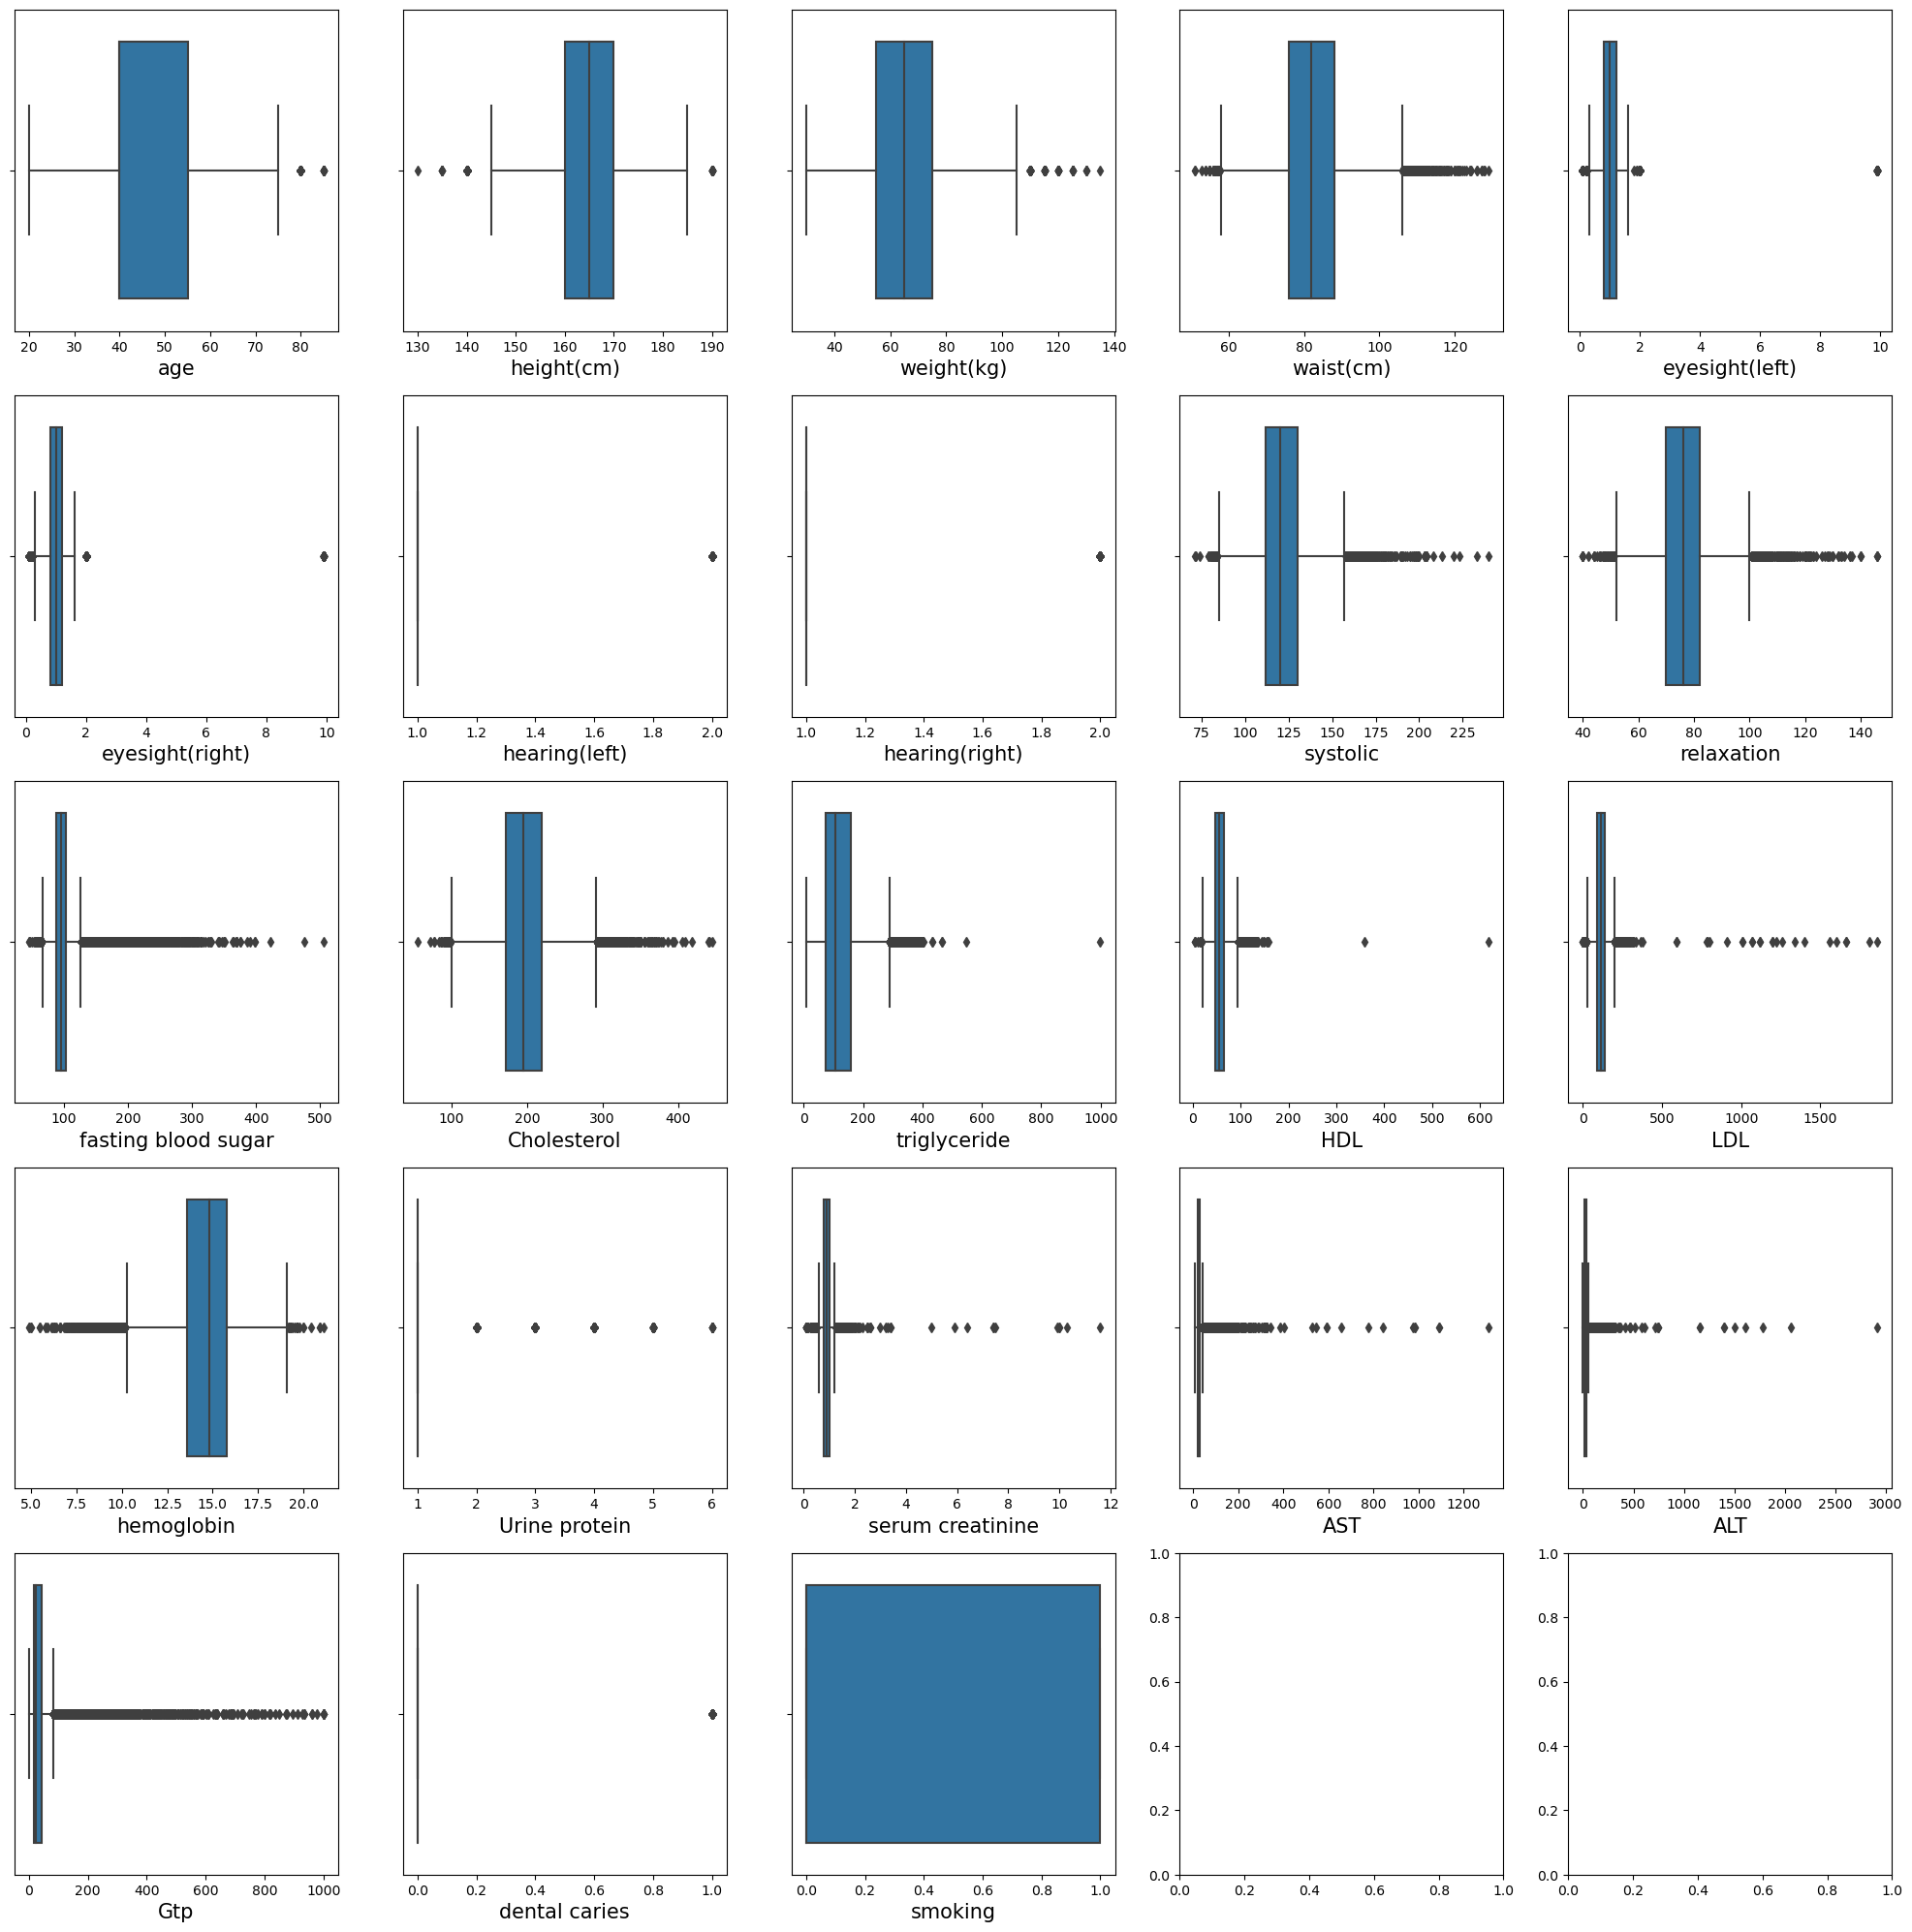

In [14]:
# Plotting box plot to detect outliers

nrows = 5
ncols = 5

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*5))

for i, j in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    rows = i//ncols
    cols = i%ncols
    sns.boxplot(x=df[j], ax=axes[rows,cols])
    axes[rows, cols].set_xlabel(j, fontsize=15)

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

#These outliers represent natural variations in the dataset & therefore they shall not be treated. 

Step 6: Preprocessing.

In [15]:
# Since there are 2 object column we shall perform one hot encoding.
lb = LabelEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i] = lb.fit_transform(df[i])
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,1,0
55688,0,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,1,0
55689,0,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0
55690,1,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0


Step 7: We will be looking at the top inpendent variables using Extra Trees classifier & how much importance it has over dependent variable. 

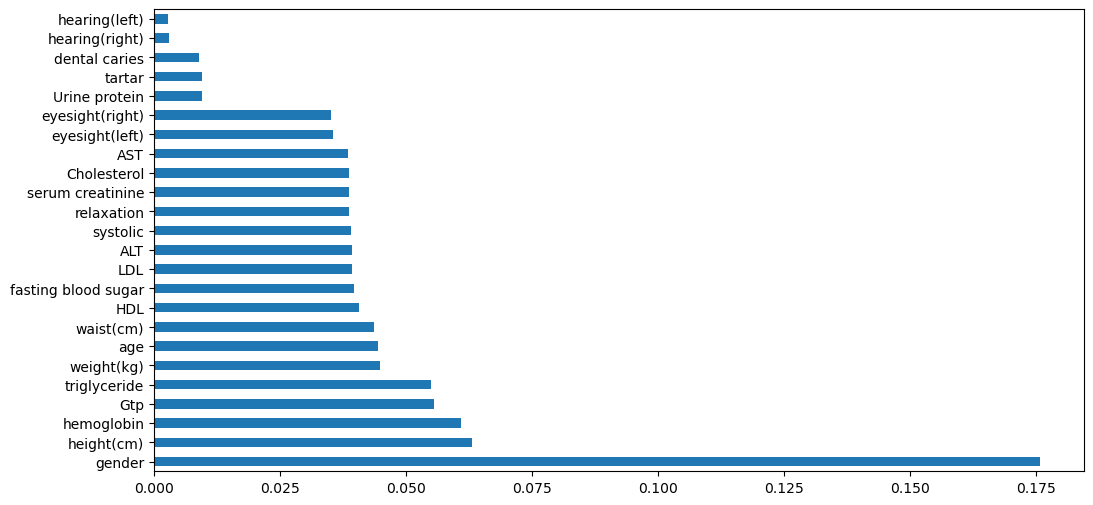

In [16]:
plt.figure(figsize=(12,6))

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x,y)

df1 = pd.Series(model.feature_importances_, index=x.columns)
df1.nlargest(24).plot(kind='barh')
plt.show()

# We shall take ony top 19 dependent variables. (We can take even <19. However, I shall only drop the last 5 variables as seen from the graph)

Step 8: Our model is ready to be trained. 

In [17]:
x = df.drop(columns=['smoking','Urine protein','hearing(left)', 'hearing(right)','dental caries', 'tartar'])
y = df.iloc[:,-1]

# Dropping the dependent variables & few independent varibales. 

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=42, stratify=y)

Step 9: Scaling.

In [19]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

Step 10: From here we shall test our model on various algorithms & thus check for various metrics.

# Model 1: Logistic Regression

In [20]:
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y)

lg = LogisticRegression(class_weight=dict(enumerate(class_weights)))

lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
lg_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Logistic regression model is: ', lg_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Logistic regression model is:  0.7102971541431008


[[4105 2943]
 [ 284 3807]]


              precision    recall  f1-score   support

           0       0.94      0.58      0.72      7048
           1       0.56      0.93      0.70      4091

    accuracy                           0.71     11139
   macro avg       0.75      0.76      0.71     11139
weighted avg       0.80      0.71      0.71     11139



# Model 2: Decision Tree

In [21]:
dt = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [2, 4, 8, 16, 32, None],
    'max_leaf_nodes':[50,100,250,500]
}

cv = GridSearchCV(dt, params, cv=5, n_jobs=-1)
cv.fit(x_train, y_train)
a = pd.DataFrame(cv.cv_results_).sort_values('mean_test_score', ascending=False)

In [22]:
# Best hyperparameters for DecisionTreeClassifier 
cv.best_params_

{'max_depth': 16, 'max_leaf_nodes': 500}

In [23]:
dt = DecisionTreeClassifier(max_depth= 16, max_leaf_nodes= 50,random_state=42)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
dt_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Decision Tree model is: ', dt_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Decision Tree model is:  0.7528503456324626


[[5604 1444]
 [1309 2782]]


              precision    recall  f1-score   support

           0       0.81      0.80      0.80      7048
           1       0.66      0.68      0.67      4091

    accuracy                           0.75     11139
   macro avg       0.73      0.74      0.74     11139
weighted avg       0.75      0.75      0.75     11139



# Model 3: Random Forest

In [24]:
rd = RandomForestClassifier(n_jobs = -1, random_state = 42)
params = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rd, params, cv = 5, n_jobs = -1)
cv.fit(x_train, y_train)
a = pd.DataFrame(cv.cv_results_).sort_values('mean_test_score', ascending = False)

In [25]:
# Best hyperparameters for RandomForestClassifier 
cv.best_params_

{'max_depth': 32, 'n_estimators': 250}

In [26]:
rd = RandomForestClassifier(max_depth= 16, n_estimators= 250,random_state=42)
rd.fit(x_train,y_train)
y_pred = rd.predict(x_test)
rd_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Random Forest model is: ', rd_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Random Forest model is:  0.810844779603196


[[5827 1221]
 [ 886 3205]]


              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7048
           1       0.72      0.78      0.75      4091

    accuracy                           0.81     11139
   macro avg       0.80      0.81      0.80     11139
weighted avg       0.82      0.81      0.81     11139



# Model 4: Bagging Classifier

In [27]:
bg = BaggingClassifier(n_jobs = -1, random_state = 42)
params = {
    'n_estimators': [5, 50, 250],
}

cv = GridSearchCV(bg, params, cv = 5, n_jobs = -1)
cv.fit(x_train, y_train)
a = pd.DataFrame(cv.cv_results_).sort_values('mean_test_score', ascending = False)

In [28]:
# Best hyperparameters for Bagging classifier 
cv.best_params_

{'n_estimators': 250}

In [29]:
bg = BaggingClassifier(n_estimators=250,random_state=42)
bg.fit(x_train,y_train)
y_pred = bg.predict(x_test)
bg_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Bagging Classfier model is: ', bg_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Bagging Classfier model is:  0.8267348954125145


[[5981 1067]
 [ 863 3228]]


              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7048
           1       0.75      0.79      0.77      4091

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Model 5: Extra Trees Classifier

In [30]:
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
params = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(et, params, cv = 5, n_jobs = -1)
cv.fit(x_train, y_train)
a = pd.DataFrame(cv.cv_results_).sort_values('mean_test_score', ascending = False)

In [31]:
# Best hyperparameters for Extra Class classifier 
cv.best_params_

{'max_depth': 32, 'n_estimators': 250}

In [32]:
et = ExtraTreesClassifier(max_depth= 32, n_estimators=250,random_state=42)
et.fit(x_train,y_train)
y_pred = et.predict(x_test)
et_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Extra Trees model is: ', et_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Extra Trees model is:  0.8279019660651764


[[5905 1143]
 [ 774 3317]]


              precision    recall  f1-score   support

           0       0.88      0.84      0.86      7048
           1       0.74      0.81      0.78      4091

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Model 6: AdaBoost Classifier

In [33]:
ad = AdaBoostClassifier(random_state = 42)
params = {
    'n_estimators': [5, 50, 250],
    'learning_rate':[0.2,0.4,0.6,0.8,1]
}

cv = GridSearchCV(ad, params, cv = 5, n_jobs = -1)
cv.fit(x_train, y_train)
a = pd.DataFrame(cv.cv_results_).sort_values('mean_test_score', ascending = False)

In [34]:
# Best hyperparameters for Ada Boost classifier 
cv.best_params_

{'learning_rate': 1, 'n_estimators': 250}

In [35]:
ad = AdaBoostClassifier(n_estimators=50, learning_rate=.8,random_state = 42)
ad.fit(x_train,y_train)
y_pred = ad.predict(x_test)
ad_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of AdaBoost model is: ', ad_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of AdaBoost model is:  0.7559924589280905


[[5473 1575]
 [1143 2948]]


              precision    recall  f1-score   support

           0       0.83      0.78      0.80      7048
           1       0.65      0.72      0.68      4091

    accuracy                           0.76     11139
   macro avg       0.74      0.75      0.74     11139
weighted avg       0.76      0.76      0.76     11139



# Model 7: Gradient Boosting Classifier

In [36]:
gb = GradientBoostingClassifier(random_state = 42)
params = {
    'n_estimators': [5, 50, 250],
    'learning_rate':[0.2,0.5,1],
    'max_depth': [2, 4, 16]
}

cv = GridSearchCV(gb, params, cv = 5, n_jobs = -1)
cv.fit(x_train, y_train)
a = pd.DataFrame(cv.cv_results_).sort_values('mean_test_score', ascending = False)

In [37]:
# Best hyperparameters for Gradient Boosting Classifier
cv.best_params_

{'learning_rate': 0.2, 'max_depth': 16, 'n_estimators': 250}

In [38]:
gb = GradientBoostingClassifier(n_estimators=250,learning_rate=0.2,max_depth=16,random_state = 10)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)
gb_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Gradient Boost model is: ', gb_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Gradient Boost model is:  0.8284406140587126


[[5998 1050]
 [ 861 3230]]


              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7048
           1       0.75      0.79      0.77      4091

    accuracy                           0.83     11139
   macro avg       0.81      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



# Model 8: Naive Bayes

In [39]:
nb = BernoulliNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
nb_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Naives Bayes model is: ', nb_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Naives Bayes model is:  0.7030254062303618


[[4668 2380]
 [ 928 3163]]


              precision    recall  f1-score   support

           0       0.83      0.66      0.74      7048
           1       0.57      0.77      0.66      4091

    accuracy                           0.70     11139
   macro avg       0.70      0.72      0.70     11139
weighted avg       0.74      0.70      0.71     11139



# Model 9: Support Vector Classifier

In [40]:
class_weights = class_weight.compute_class_weight('balanced', classes=[0, 1], y=y)

sv = SVC(class_weight=dict(enumerate(class_weights)))

sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
sv_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Logistic regression model is: ', sv_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Logistic regression model is:  0.7129006194451926


[[4108 2940]
 [ 258 3833]]


              precision    recall  f1-score   support

           0       0.94      0.58      0.72      7048
           1       0.57      0.94      0.71      4091

    accuracy                           0.71     11139
   macro avg       0.75      0.76      0.71     11139
weighted avg       0.80      0.71      0.71     11139



# Model 10: Xgboost

In [41]:
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
xg_acc = accuracy_score(y_test,y_pred)
print('The accuracy score of Xg Boost model is: ', xg_acc)
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

The accuracy score of Xg Boost model is:  0.7749349133674477


[[5680 1368]
 [1139 2952]]


              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7048
           1       0.68      0.72      0.70      4091

    accuracy                           0.77     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.78      0.77      0.78     11139



In [44]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 
              'Bagging Classifier', 'Extra Trees Classifier ', 'Ada Boost', 
              'Gradient Boost Classifier', 'Naives Bayes', 'Support Vector Classfier',
              'Xg Boost Classifier'],
    'Accuracy': [lg_acc,dt_acc,rd_acc,bg_acc,et_acc,ad_acc,gb_acc,nb_acc,sv_acc,xg_acc]})

models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Gradient Boost Classifier,0.828441
4,Extra Trees Classifier,0.827902
3,Bagging Classifier,0.826735
2,Random Forest,0.810845
9,Xg Boost Classifier,0.774935
5,Ada Boost,0.755992
1,Decision Tree,0.752850
8,Support Vector Classfier,0.712901
0,Logistic Regression,0.710297
7,Naives Bayes,0.703025
